# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [21]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [24]:
# Visit the website
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [25]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')

In [28]:
# Extract all rows of data
mars_temp_table = html_soup.find('table', class_='table')
print(mars_temp_table)


<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [32]:
# Create an empty list
rows_list = []

# all headings are in 
row_headings = mars_temp_table.find_all('th')
col_headers_list =[]
for header in row_headings:
    title= header.text
    col_headers_list.append(title)
col_headers_list

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [35]:
# Create a Pandas DataFrame by using the list of the column names
mars_weather_df = pd.DataFrame(columns=col_headers_list)
mars_weather_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure


In [65]:
for row in mars_temp_table.find_all('tr',class_='data-row'):
        data = row.find_all('td')
        row_data=[td.text.strip() for td in data]
        size_of_df=len(mars_weather_df)
        mars_weather_df.loc[size_of_df]=row_data
mars_weather_df.head()       

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16 00:00:00,10,155,6,-75.0,739.0
1,13,2012-08-17 00:00:00,11,156,6,-76.0,740.0
2,24,2012-08-18 00:00:00,12,156,6,-76.0,741.0
3,35,2012-08-19 00:00:00,13,157,6,-74.0,732.0
4,46,2012-08-20 00:00:00,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [66]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [67]:
# Change data types for data analysis
mars_weather_df['id']=mars_weather_df['id'].astype(int)
mars_weather_df['terrestrial_date']=pd.to_datetime(mars_weather_df['terrestrial_date'])
mars_weather_df['sol']=mars_weather_df['sol'].astype(int)
mars_weather_df['ls']=mars_weather_df['ls'].astype(int)
mars_weather_df['month']=mars_weather_df['month'].astype(int)
mars_weather_df['min_temp']=mars_weather_df['min_temp'].astype(float)
mars_weather_df['pressure']=mars_weather_df['pressure'].astype(float)


In [68]:
# Confirm type changes were successful by examining data types again
mars_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7468 entries, 0 to 7467
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                7468 non-null   int32         
 1   terrestrial_date  7468 non-null   datetime64[ns]
 2   sol               7468 non-null   int32         
 3   ls                7468 non-null   int32         
 4   month             7468 non-null   int32         
 5   min_temp          7468 non-null   float64       
 6   pressure          7468 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 350.1 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [69]:
# 1. How many months are there on Mars?
nb_of_months=mars_weather_df['month'].nunique()
print(f'There are', nb_of_months ,'months on Mars.')

There are 12 months on Mars.


In [70]:
# 2. How many Martian days' worth of data are there?
first_day_of_data=mars_weather_df['sol'].min()
last_day_of_data = mars_weather_df['sol'].max()
unique_days_date=mars_weather_df['sol'].nunique()
print(f'There are ', unique_days_date, ' Martian days worth of data here')

There are  1867  Martian days worth of data here


In [71]:
# 3. What is the average low temperature by month?
avg_min_temp=[]

for month_is in range(1,nb_of_months+1):
    weather_per_month={"month_is":"","avg_min_temp":""}
    avg_min_temp_month=mars_weather_df.loc[mars_weather_df['month']==month_is]['min_temp'].mean()
    round_avg_min_temp_month = round(avg_min_temp_month,6)
    weather_per_month["month_is"] = month_is
    weather_per_month["avg_min_temp"] = round_avg_min_temp_month
    avg_min_temp.append(weather_per_month) 
    
print(avg_min_temp)  # this is not the right format

[{'month_is': 1, 'avg_min_temp': -77.16092}, {'month_is': 2, 'avg_min_temp': -79.932584}, {'month_is': 3, 'avg_min_temp': -83.307292}, {'month_is': 4, 'avg_min_temp': -82.747423}, {'month_is': 5, 'avg_min_temp': -79.308725}, {'month_is': 6, 'avg_min_temp': -75.29932}, {'month_is': 7, 'avg_min_temp': -72.28169}, {'month_is': 8, 'avg_min_temp': -68.382979}, {'month_is': 9, 'avg_min_temp': -69.171642}, {'month_is': 10, 'avg_min_temp': -71.982143}, {'month_is': 11, 'avg_min_temp': -71.985507}, {'month_is': 12, 'avg_min_temp': -74.451807}]


In [82]:
import json
json_mars_temp = json.dumps(avg_min_temp)
# Save json as df file
months_temp_df =pd.read_json(json_mars_temp)
months_temp_str_df = months_temp_df.to_string(index=False)
print(months_temp_str_df)

 month_is  avg_min_temp
        1    -77.160920
        2    -79.932584
        3    -83.307292
        4    -82.747423
        5    -79.308725
        6    -75.299320
        7    -72.281690
        8    -68.382979
        9    -69.171642
       10    -71.982143
       11    -71.985507
       12    -74.451807


Text(0.5, 1.0, 'Average Min Temperature by Month')

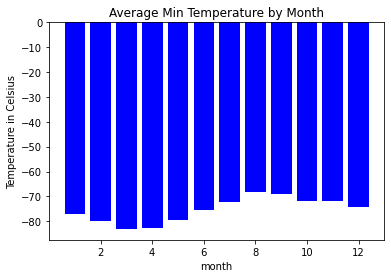

In [88]:
# Plot the average min temperature by month
# Plot avg_min_temp
plt.bar(months_temp_df['month_is'],months_temp_df['avg_min_temp'], color='blue')

# Create labels for the x and y axes.
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")

# Create title 
plt.title('Average Min Temperature by Month')

In [89]:
# The coldest month is March with -83 degrees
min_avg_temp = months_temp_df['avg_min_temp'].min()
month_min_temp2=months_temp_df.loc[months_temp_df['avg_min_temp']==min_avg_temp]
month_min_temp2


,month_is,avg_min_temp
2,3,-83.307292


In [90]:
# the warmest min temp month is August with -68 degrees
max_avg_temp = months_temp_df['avg_min_temp'].max()
month_max_temp=months_temp_df.loc[months_temp_df['avg_min_temp']==max_avg_temp]
month_max_temp

,month_is,avg_min_temp
7,8,-68.382979


Text(0.5, 1.0, 'Average Min Temperature by Sorted Temperature')

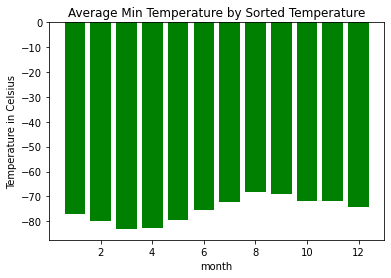

In [91]:
# Identify the coldest and hottest months in Curiosity's location
# Plot avg_min_temp sorted
df_sorted = months_temp_df.sort_values('avg_min_temp')
plt.bar(months_temp_df['month_is'],months_temp_df['avg_min_temp'], data=df_sorted,  color='green')
# Create labels for the x and y axes.
plt.xlabel("month")
plt.ylabel("Temperature in Celsius")

# Create title 
plt.title('Average Min Temperature by Sorted Temperature')

In [93]:
# 4. Average pressure by Martian month
# Grouping DataFrame by the average of pressure for each month
df_by_month=mars_weather_df.groupby('month')
df_month_pressure=df_by_month.mean().loc[:,['pressure']]
df_month_pressure

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [94]:
# The month with the lowest atmospheric pressure  
min_avg_pressure= df_month_pressure['pressure'].min()
month_min_pressure=df_month_pressure.loc[df_month_pressure['pressure']==min_avg_pressure]
month_min_pressure

,pressure
month,
6,745.054422


Text(0.5, 1.0, 'Average Atmospheric Pressure by Month')

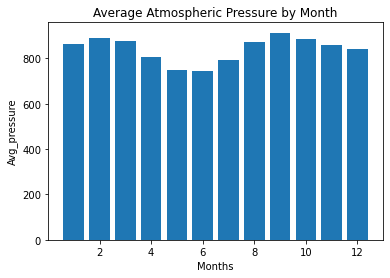

In [96]:
# Plot the average pressure by month
x=range(1,13)
plt.bar(x,df_month_pressure['pressure'])

# Create labels for the x and y axes.
plt.xlabel("Months")
plt.ylabel("Avg_pressure")

# Create title 
plt.title('Average Atmospheric Pressure by Month')

In [100]:
# 5. How many terrestrial (earth) days are there in a Martian year?
#Finding the original Sun's longitude
orig_long=mars_weather_df['ls'].loc[0]
print(f'Tthe original Sun longitude is',orig_long)


Tthe original Sun longitude is 155


In [102]:
#in one year the sun longitude should be the same 
same_long=mars_weather_df.loc[mars_weather_df['ls']==orig_long]
same_long.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [104]:
import datetime as dt
from datetime import timedelta
from datetime import datetime

a=same_long['terrestrial_date'].loc[0]
date_after_one_mars_year = same_long['terrestrial_date'].iloc[1]
one_mars_year= date_after_one_mars_year-a
print(f'In one Mars year there are about ',one_mars_year,' Earth days')

In one Mars year there are about  686 days 00:00:00  Earth days


Text(0.5, 1.0, 'Daily minimum temperature')

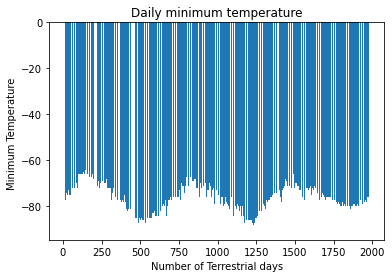

In [106]:
# Ploting the minimum temperature vs Martian Days 
plt.bar(mars_weather_df['sol'],mars_weather_df['min_temp'])

# Create labels for the x and y axes.
plt.xlabel("Number of Terrestrial days")
plt.ylabel("Minimum Temperature ")

# Create title 
plt.title('Daily minimum temperature')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [107]:
# Write the data to a CSV
mars_weather_df.to_csv('mars_table.csv',index=False)

In [108]:
browser.quit()